# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MaxAbsScaler
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')


# Loading the Dataset

In [2]:
df=pd.read_csv("train.csv")
df

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,...,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,...,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,C-43723,Angelyn Clevenger,M,38,4969.41,Low,Commercial associate,Managers,Urban,76657.90,...,869.61,0,Unpossessed,566,4969.41,4,Urban,1,111096.56,68992.11
29996,C-32511,Silas Slaugh,M,20,1606.88,Low,Working,Laborers,Semi-Urban,66595.14,...,729.41,0,Inactive,175,1606.88,3,Urban,1,73453.94,46616.60
29997,C-5192,Carmelo Lone,F,49,NaN,Low,Working,Sales staff,Urban,81410.08,...,NaN,0,Active,959,NaN,1,Rural,1,102108.02,61057.56
29998,C-12172,Carolann Osby,M,38,2417.71,Low,Working,Security staff,Semi-Urban,142524.10,...,677.27,1,Unpossessed,375,2417.71,4,Urban,1,168194.47,99766.87


In [3]:
df.describe()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Age,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD)
count,30000.000000,2.542400e+04,30000.000000,29828.000000,27507.000000,28297.000000,30000.000000,30000.000000,2.515000e+04,30000.000000,30000.000000,3.000000e+04,29660.000000
mean,40.092300,2.630574e+03,88826.333855,400.936876,2.253027,739.885381,0.193933,501.934700,2.631119e+03,2.460067,-4.743867,1.317597e+05,47649.342208
std,16.045129,1.126272e+04,59536.949605,242.545375,0.951162,72.163846,0.395384,288.158086,1.132268e+04,1.118562,74.614593,9.354955e+04,48221.146686
min,18.000000,3.777000e+02,6048.240000,-999.000000,1.000000,580.000000,0.000000,1.000000,3.777000e+02,1.000000,-999.000000,-9.990000e+02,-999.000000
25%,25.000000,1.650457e+03,41177.755000,247.667500,2.000000,681.880000,0.000000,251.000000,1.650450e+03,1.000000,1.000000,6.057216e+04,0.000000
50%,40.000000,2.222435e+03,75128.075000,375.205000,2.000000,739.820000,0.000000,504.000000,2.223250e+03,2.000000,1.000000,1.099936e+05,35209.395000
75%,55.000000,3.090593e+03,119964.605000,521.292500,3.000000,799.120000,0.000000,751.000000,3.091407e+03,3.000000,1.000000,1.788807e+05,74261.250000
max,65.000000,1.777460e+06,621497.820000,3840.880000,14.000000,896.260000,1.000000,999.000000,1.777460e+06,4.000000,1.000000,1.077967e+06,481907.320000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  30000 non-null  object 
 1   Name                         30000 non-null  object 
 2   Gender                       29947 non-null  object 
 3   Age                          30000 non-null  int64  
 4   Income (USD)                 25424 non-null  float64
 5   Income Stability             28317 non-null  object 
 6   Profession                   30000 non-null  object 
 7   Type of Employment           22730 non-null  object 
 8   Location                     30000 non-null  object 
 9   Loan Amount Request (USD)    30000 non-null  float64
 10  Current Loan Expenses (USD)  29828 non-null  float64
 11  Expense Type 1               30000 non-null  object 
 12  Expense Type 2               30000 non-null  object 
 13  Dependents      

# Preprocessing the Data

In [5]:
df.isnull().sum()

Customer ID                       0
Name                              0
Gender                           53
Age                               0
Income (USD)                   4576
Income Stability               1683
Profession                        0
Type of Employment             7270
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card         1566
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64

In [6]:
# fill the missing values for numerical terms - mean
df['Loan Sanction Amount (USD)'] = df['Loan Sanction Amount (USD)'].fillna(df['Loan Sanction Amount (USD)'].mean())
df['Property Age'] = df['Property Age'].fillna(df['Property Age'].mean())
df['Credit Score'] = df['Credit Score'].fillna(df['Credit Score'].mean())
df['Current Loan Expenses (USD)'] = df['Current Loan Expenses (USD)'].fillna(df['Current Loan Expenses (USD)'].mean())
df['Income (USD)'] = df['Income (USD)'].fillna(df['Income (USD)'].mean())

In [7]:
# fill the missing values for categorical terms - mode
df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df['Income Stability'] = df["Income Stability"].fillna(df['Income Stability'].mode()[0])
df['Type of Employment'] = df["Type of Employment"].fillna(df['Type of Employment'].mode()[0])
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])
df['Has Active Credit Card'] = df["Has Active Credit Card"].fillna(df['Has Active Credit Card'].mode()[0])
df['Property Location'] = df["Property Location"].fillna(df['Property Location'].mode()[0])

In [8]:
# replace "-999" to NaN
df['Loan Sanction Amount (USD)'].replace(-999.0, np.nan, inplace = True)

In [9]:
df.dropna(axis=0,inplace=True)

In [10]:
df.isnull().sum()

Customer ID                    0
Name                           0
Gender                         0
Age                            0
Income (USD)                   0
Income Stability               0
Profession                     0
Type of Employment             0
Location                       0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Expense Type 1                 0
Expense Type 2                 0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Has Active Credit Card         0
Property ID                    0
Property Age                   0
Property Type                  0
Property Location              0
Co-Applicant                   0
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64

# Exploratory Data Analysis

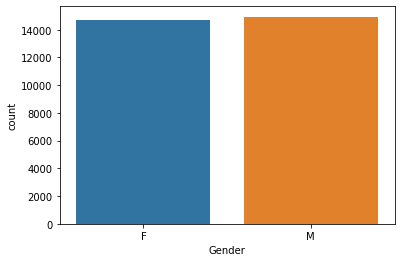

In [11]:
# categorical attributes visualization
sns.countplot(df['Gender'])

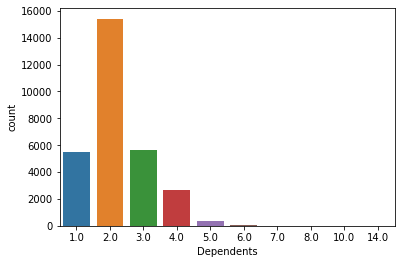

In [12]:
sns.countplot(df['Dependents'])

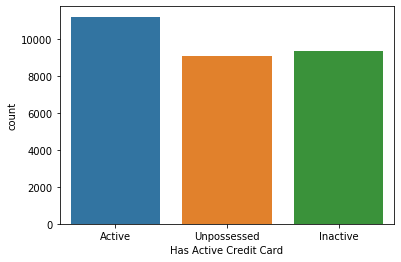

In [13]:
sns.countplot(df['Has Active Credit Card'])

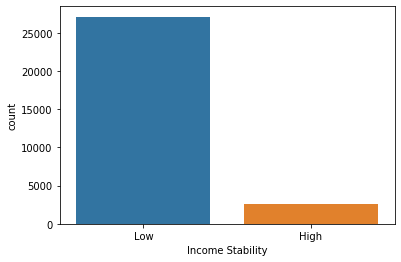

In [14]:
sns.countplot(df['Income Stability'])

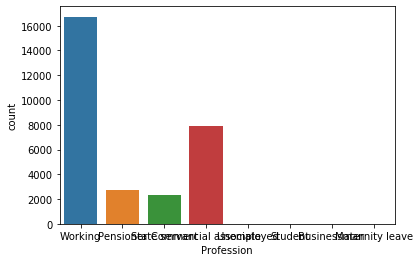

In [15]:
sns.countplot(df['Profession'])

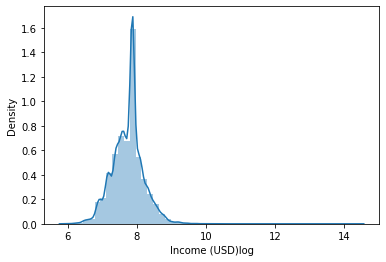

In [16]:
# numerical attributes visualization
df['Income (USD)log'] = np.log(df['Income (USD)']+1)
sns.distplot(df["Income (USD)log"])

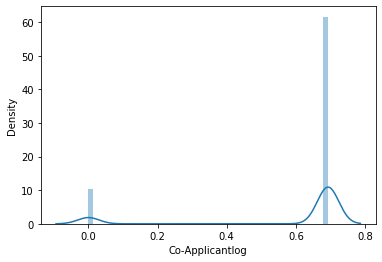

In [17]:
df['Co-Applicantlog'] = np.log(df['Co-Applicant']+1)
sns.distplot(df['Co-Applicantlog'])

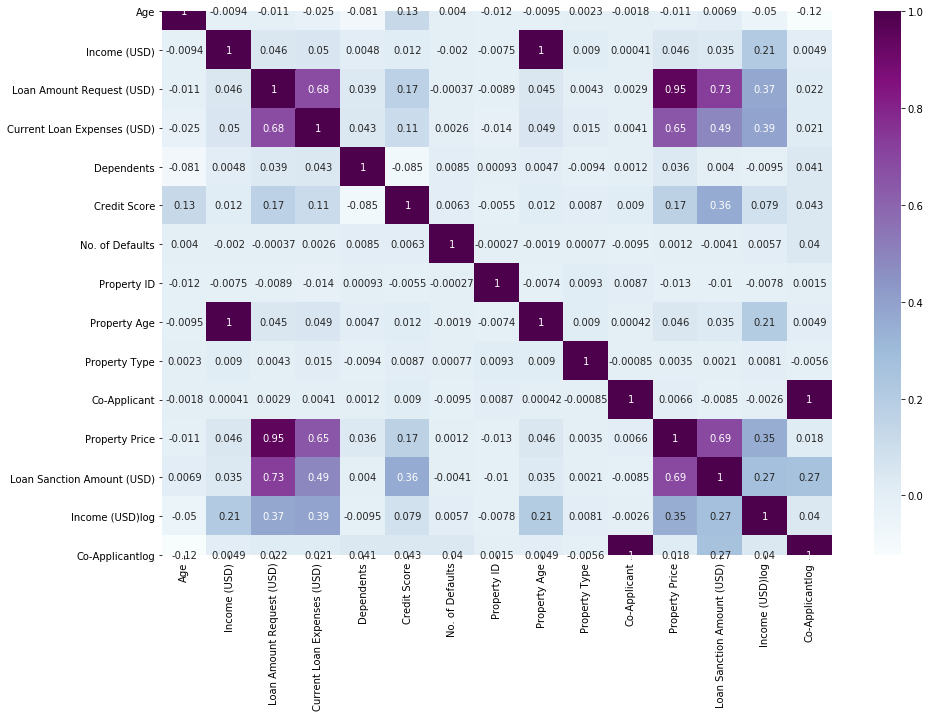

In [18]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

In [19]:
# drop unnecessary columns
cols = ['Customer ID', 'Name','Co-Applicantlog',"Income (USD)log"]
df = df.drop(columns=cols, axis=1)
df.head()

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,F,56,1933.050000,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,...,809.44,0,Active,746,1933.05000,4,Rural,1,119933.46,54607.18
1,M,32,4952.910000,Low,Working,Laborers,Semi-Urban,46837.47,495.81,N,...,780.40,0,Unpossessed,608,4952.91000,2,Rural,1,54791.00,37469.98
2,F,65,988.190000,High,Pensioner,Laborers,Semi-Urban,45593.04,171.95,N,...,833.15,0,Unpossessed,546,988.19000,2,Urban,0,72440.58,36474.43
3,F,65,2630.574417,High,Pensioner,Laborers,Rural,80057.92,298.54,N,...,832.70,1,Unpossessed,890,2631.11944,2,Semi-Urban,1,121441.51,56040.54
4,F,31,2614.770000,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,...,745.55,1,Active,715,2614.77000,4,Semi-Urban,1,208567.91,74008.28


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29662 entries, 0 to 29999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       29662 non-null  object 
 1   Age                          29662 non-null  int64  
 2   Income (USD)                 29662 non-null  float64
 3   Income Stability             29662 non-null  object 
 4   Profession                   29662 non-null  object 
 5   Type of Employment           29662 non-null  object 
 6   Location                     29662 non-null  object 
 7   Loan Amount Request (USD)    29662 non-null  float64
 8   Current Loan Expenses (USD)  29662 non-null  float64
 9   Expense Type 1               29662 non-null  object 
 10  Expense Type 2               29662 non-null  object 
 11  Dependents                   29662 non-null  float64
 12  Credit Score                 29662 non-null  float64
 13  No. of Defaults 

# Label Encoding

In [21]:
cols = ['Gender',"Income Stability","Profession",'Type of Employment',"Location","Expense Type 1","Expense Type 2",'Has Active Credit Card','Property Location']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [22]:
df

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,0,56,1933.050000,1,7,14,1,72809.58,241.08,0,...,809.440000,0,0,746,1933.05000,4,0,1,119933.46,54607.18
1,1,32,4952.910000,1,7,8,1,46837.47,495.81,0,...,780.400000,0,2,608,4952.91000,2,0,1,54791.00,37469.98
2,0,65,988.190000,0,3,8,1,45593.04,171.95,0,...,833.150000,0,2,546,988.19000,2,2,0,72440.58,36474.43
3,0,65,2630.574417,0,3,8,0,80057.92,298.54,0,...,832.700000,1,2,890,2631.11944,2,1,1,121441.51,56040.54
4,0,31,2614.770000,1,7,6,1,113858.89,491.41,0,...,745.550000,1,0,715,2614.77000,4,1,1,208567.91,74008.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1,38,4969.410000,1,1,10,2,76657.90,722.34,1,...,869.610000,0,2,566,4969.41000,4,2,1,111096.56,68992.11
29996,1,20,1606.880000,1,7,8,1,66595.14,253.04,0,...,729.410000,0,1,175,1606.88000,3,2,1,73453.94,46616.60
29997,0,49,2630.574417,1,7,14,2,81410.08,583.11,0,...,739.885381,0,0,959,2631.11944,1,0,1,102108.02,61057.56
29998,1,38,2417.710000,1,7,16,1,142524.10,378.29,0,...,677.270000,1,2,375,2417.71000,4,2,1,168194.47,99766.87


# Normalising the values

In [23]:
sts = MaxAbsScaler()

In [24]:
feature_scale = ['Age','Income (USD)','Loan Amount Request (USD)','Current Loan Expenses (USD)','Property ID','Property Age','Property Price']
df[feature_scale]=sts.fit_transform(df[feature_scale])

In [25]:
df.describe()

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
count,29662.000000,29662.000000,29662.000000,29662.000000,29662.000000,29662.000000,29662.000000,29662.000000,29662.000000,29662.000000,...,29662.000000,29662.000000,29662.000000,29662.000000,29662.000000,29662.000000,29662.000000,29662.000000,29662.000000,29662.000000
mean,0.503574,0.617118,0.001480,0.914133,4.803048,7.895759,0.925224,0.142904,0.104394,0.359146,...,739.928051,0.193851,0.929067,0.502568,0.001481,2.459982,0.972119,-4.639910,0.122218,48203.692544
std,0.499996,0.246923,0.005866,0.280173,2.629649,3.891094,0.524898,0.095779,0.062872,0.479758,...,70.113409,0.395320,0.824484,0.288378,0.005865,1.118603,0.800651,73.917297,0.086732,47935.850348
min,0.000000,0.276923,0.000212,0.000000,0.000000,0.000000,0.000000,0.009732,-0.260097,0.000000,...,580.000000,0.000000,0.000000,0.001001,0.000212,1.000000,0.000000,-999.000000,-0.000927,0.000000
25%,0.000000,0.384615,0.000980,1.000000,1.000000,6.000000,1.000000,0.066244,0.064677,0.000000,...,685.420000,0.000000,0.000000,0.252252,0.000984,1.000000,0.000000,1.000000,0.056189,0.000000
50%,1.000000,0.615385,0.001390,1.000000,7.000000,8.000000,1.000000,0.120846,0.098002,0.000000,...,739.885381,0.000000,1.000000,0.504505,0.001400,2.000000,1.000000,1.000000,0.102041,37004.530000
75%,1.000000,0.846154,0.001614,1.000000,7.000000,10.000000,1.000000,0.193030,0.135414,1.000000,...,795.207500,0.000000,2.000000,0.751752,0.001603,3.000000,2.000000,1.000000,0.166010,74253.980000
max,1.000000,1.000000,1.000000,1.000000,7.000000,17.000000,2.000000,1.000000,1.000000,1.000000,...,896.260000,1.000000,2.000000,1.000000,1.000000,4.000000,2.000000,1.000000,1.000000,481907.320000


In [26]:
df.isnull().sum()

Gender                         0
Age                            0
Income (USD)                   0
Income Stability               0
Profession                     0
Type of Employment             0
Location                       0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Expense Type 1                 0
Expense Type 2                 0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Has Active Credit Card         0
Property ID                    0
Property Age                   0
Property Type                  0
Property Location              0
Co-Applicant                   0
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64

### Converting float datatype to int

In [27]:
df[['Loan Sanction Amount (USD)']] = df[["Loan Sanction Amount (USD)"]].astype("int")

# Importing and  Preparing the Test Data

In [28]:
df2=pd.read_csv("test.csv")
df2

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price
0,C-26247,Tandra Olszewski,F,47,3472.69,Low,Commercial associate,Managers,Semi-Urban,137088.98,...,2.0,799.14,0,Unpossessed,843,3472.69,2,Urban,1,236644.5
1,C-35067,Jeannette Cha,F,57,1184.84,Low,Working,Sales staff,Rural,104771.59,...,2.0,833.31,0,Unpossessed,22,1184.84,1,Rural,1,142357.3
2,C-34590,Keva Godfrey,F,52,1266.27,Low,Working,NaN,Semi-Urban,176684.91,...,3.0,627.44,0,Unpossessed,1,1266.27,1,Urban,1,300991.24
3,C-16668,Elva Sackett,M,65,1369.72,High,Pensioner,NaN,Rural,97009.18,...,2.0,833.20,0,Inactive,730,1369.72,1,Semi-Urban,0,125612.1
4,C-12196,Sade Constable,F,60,1939.23,High,Pensioner,NaN,Urban,109980.00,...,NaN,NaN,0,NaN,356,1939.23,4,Semi-Urban,1,180908.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,C-9076,Tobias Davilla,F,19,1349.60,Low,Commercial associate,NaN,Semi-Urban,156766.97,...,4.0,684.32,0,Inactive,681,1349.60,4,Semi-Urban,1,212778.0
19996,C-17587,Evelina Hodges,M,22,2019.78,Low,Working,Core staff,Urban,47924.80,...,NaN,706.34,0,Inactive,213,2019.78,4,Urban,1,90816.95
19997,C-46479,Karlyn Mckinzie,M,19,2252.03,Low,Working,Core staff,Semi-Urban,18629.88,...,1.0,656.46,0,Inactive,270,2252.03,2,Rural,0,21566.27
19998,C-3099,Mariana Pulver,F,21,1845.35,Low,Working,NaN,Semi-Urban,95430.73,...,2.0,865.46,0,Unpossessed,489,1845.35,1,Semi-Urban,1,120281.17


In [29]:
# replace "?" to NaN
df2.replace("?", np.nan, inplace = True)
df2.head(5)

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price
0,C-26247,Tandra Olszewski,F,47,3472.69,Low,Commercial associate,Managers,Semi-Urban,137088.98,...,2.0,799.14,0,Unpossessed,843,3472.69,2,Urban,1,236644.5
1,C-35067,Jeannette Cha,F,57,1184.84,Low,Working,Sales staff,Rural,104771.59,...,2.0,833.31,0,Unpossessed,22,1184.84,1,Rural,1,142357.3
2,C-34590,Keva Godfrey,F,52,1266.27,Low,Working,NaN,Semi-Urban,176684.91,...,3.0,627.44,0,Unpossessed,1,1266.27,1,Urban,1,300991.24
3,C-16668,Elva Sackett,M,65,1369.72,High,Pensioner,NaN,Rural,97009.18,...,2.0,833.20,0,Inactive,730,1369.72,1,Semi-Urban,0,125612.1
4,C-12196,Sade Constable,F,60,1939.23,High,Pensioner,NaN,Urban,109980.00,...,NaN,NaN,0,NaN,356,1939.23,4,Semi-Urban,1,180908.0


In [30]:
df2.isnull().sum()

Customer ID                       0
Name                              0
Gender                           31
Age                               0
Income (USD)                    750
Income Stability                813
Profession                        0
Type of Employment             4689
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)      83
Expense Type 1                    0
Expense Type 2                    0
Dependents                     1142
Credit Score                    743
No. of Defaults                   0
Has Active Credit Card         1076
Property ID                       0
Property Age                    892
Property Type                     0
Property Location               160
Co-Applicant                     77
Property Price                  168
dtype: int64

In [31]:
# fill the missing values for numerical terms - mean

df2['Property Age'] = df2['Property Age'].fillna(df2['Property Age'].mean())
df2['Credit Score'] = df2['Credit Score'].fillna(df2['Credit Score'].mean())
df2['Current Loan Expenses (USD)'] = df2['Current Loan Expenses (USD)'].fillna(df2['Current Loan Expenses (USD)'].mean())
df2['Income (USD)'] = df2['Income (USD)'].fillna(df2['Income (USD)'].mean())

In [32]:
# fill the missing values for categorical terms - mode
df2['Gender'] = df2["Gender"].fillna(df2['Gender'].mode()[0])
df2['Income Stability'] = df2["Income Stability"].fillna(df2['Income Stability'].mode()[0])
df2['Type of Employment'] = df2["Type of Employment"].fillna(df2['Type of Employment'].mode()[0])
df2['Dependents'] = df2["Dependents"].fillna(df2['Dependents'].mode()[0])
df2['Has Active Credit Card'] = df2["Has Active Credit Card"].fillna(df2['Has Active Credit Card'].mode()[0])
df2['Property Location'] = df2["Property Location"].fillna(df2['Property Location'].mode()[0])

df2['Property Price'] = df2['Property Price'].fillna(df2['Property Price'].mode()[0])
df2['Co-Applicant'] = df2["Co-Applicant"].fillna(df2['Co-Applicant'].mode()[0])

In [33]:
df2.isnull().sum()

Customer ID                    0
Name                           0
Gender                         0
Age                            0
Income (USD)                   0
Income Stability               0
Profession                     0
Type of Employment             0
Location                       0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Expense Type 1                 0
Expense Type 2                 0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Has Active Credit Card         0
Property ID                    0
Property Age                   0
Property Type                  0
Property Location              0
Co-Applicant                   0
Property Price                 0
dtype: int64

test data preparing similiar to train data for proper prediction

In [34]:
df5=df2['Customer ID']

In [35]:
# drop unnecessary columns
cols = ['Customer ID', 'Name']
df2 = df2.drop(columns=cols, axis=1)
df2.head()

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,...,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price
0,F,47,3472.69,Low,Commercial associate,Managers,Semi-Urban,137088.98,396.72,N,...,2.0,799.140000,0,Unpossessed,843,3472.69,2,Urban,1,236644.5
1,F,57,1184.84,Low,Working,Sales staff,Rural,104771.59,463.76,Y,...,2.0,833.310000,0,Unpossessed,22,1184.84,1,Rural,1,142357.3
2,F,52,1266.27,Low,Working,Laborers,Semi-Urban,176684.91,493.15,N,...,3.0,627.440000,0,Unpossessed,1,1266.27,1,Urban,1,300991.24
3,M,65,1369.72,High,Pensioner,Laborers,Rural,97009.18,446.15,N,...,2.0,833.200000,0,Inactive,730,1369.72,1,Semi-Urban,0,125612.1
4,F,60,1939.23,High,Pensioner,Laborers,Urban,109980.00,370.10,N,...,2.0,738.821538,0,Active,356,1939.23,4,Semi-Urban,1,180908.0


# Label Encoding

In [36]:
cols = ['Gender',"Income Stability","Profession",'Type of Employment',"Location","Expense Type 1","Expense Type 2",'Has Active Credit Card','Property Location']
le = LabelEncoder()
for col in cols:
    df2[col] = le.fit_transform(df2[col])

In [37]:
df2

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,...,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price
0,0,47,3472.69,1,0,10,1,137088.98,396.72,0,...,2.0,799.140000,0,2,843,3472.69,2,2,1,236644.5
1,0,57,1184.84,1,6,14,0,104771.59,463.76,1,...,2.0,833.310000,0,2,22,1184.84,1,0,1,142357.3
2,0,52,1266.27,1,6,8,1,176684.91,493.15,0,...,3.0,627.440000,0,2,1,1266.27,1,2,1,300991.24
3,1,65,1369.72,0,2,8,0,97009.18,446.15,0,...,2.0,833.200000,0,1,730,1369.72,1,1,0,125612.1
4,0,60,1939.23,0,2,8,2,109980.00,370.10,0,...,2.0,738.821538,0,0,356,1939.23,4,1,1,180908.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,19,1349.60,1,0,8,1,156766.97,500.59,1,...,4.0,684.320000,0,1,681,1349.60,4,1,1,212778.0
19996,1,22,2019.78,1,6,3,2,47924.80,243.02,1,...,2.0,706.340000,0,1,213,2019.78,4,2,1,90816.95
19997,1,19,2252.03,1,6,3,1,18629.88,101.88,1,...,1.0,656.460000,0,1,270,2252.03,2,0,0,21566.27
19998,0,21,1845.35,1,6,8,1,95430.73,271.31,0,...,2.0,865.460000,0,2,489,1845.35,1,1,1,120281.17


# Normalising the Test Data

In [38]:
sts = MaxAbsScaler()

In [39]:
feature_scale = ['Age','Income (USD)','Loan Amount Request (USD)','Current Loan Expenses (USD)','Property ID','Property Age','Property Price']
df2[feature_scale]=sts.fit_transform(df2[feature_scale])

# Model Creation

In [40]:
x=df.drop(['Loan Sanction Amount (USD)'],axis=1)
y=df['Loan Sanction Amount (USD)']

In [41]:
model = XGBRegressor()

In [42]:
model.fit(x,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

### Predicting And Saving it in Dataframe

In [43]:
y_predicted1=model.predict(df2)

In [52]:
submission=pd.DataFrame({
    'Customer ID':df5,
    'Loan Sanction Amount (USD)':abs(y_predicted1)
})
submission

,Customer ID,Loan Sanction Amount (USD)
0,C-26247,104263.187500
1,C-35067,46596.539062
2,C-34590,22972.056641
3,C-16668,38037.875000
4,C-12196,73297.218750
...,...,...
19995,C-9076,83984.070312
19996,C-17587,23187.367188
19997,C-46479,217.206909
19998,C-3099,74382.765625


In [53]:
submission.to_csv('predictiomxgboost_4445.csv',index=False)

# Evaluation

In [46]:
model.score(x,y)

0.9043187680209511

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [55]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    legend = plt.legend(loc = "upper right",fontsize = "medium")
    plt.xlabel('no. of entries')
    plt.ylabel('Loan sanctitioned USD')
    
    plt.show()
    plt.close()

In [49]:
y_predicted2=model.predict(x)

In [50]:
# Evaluating how model is fitted and the comparison of actual and predicted values

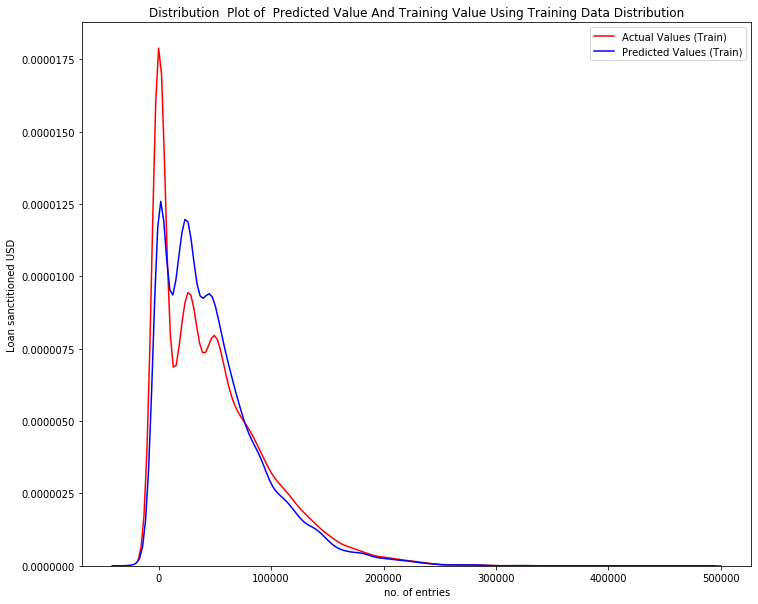

In [56]:
Title = 'Distribution  Plot of  Predicted Value And Training Value Using Training Data Distribution'
DistributionPlot(y, y_predicted2, "Actual Values (Train)", "Predicted Values (Train)", Title)